# StableVideoDiffusion Continuous Pipeline

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/dog.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/matrix.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/space.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/robots.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/car.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/dog.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/matrix.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/space.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/robots.jpeg
/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/car.jpeg


## Load model

In [4]:
!pip install --upgrade diffusers transformers datasets

In [5]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

pipeline = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()
pipeline.unet.enable_forward_chunking()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
image = load_image("/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/high-score/car.jpeg")
image = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipeline(image, decode_chunk_size=2, generator=generator).frames[0]
export_to_video(frames, "generated_t4.mp4", fps=5)

  0%|          | 0/25 [00:00<?, ?it/s]

'generated_t4.mp4'

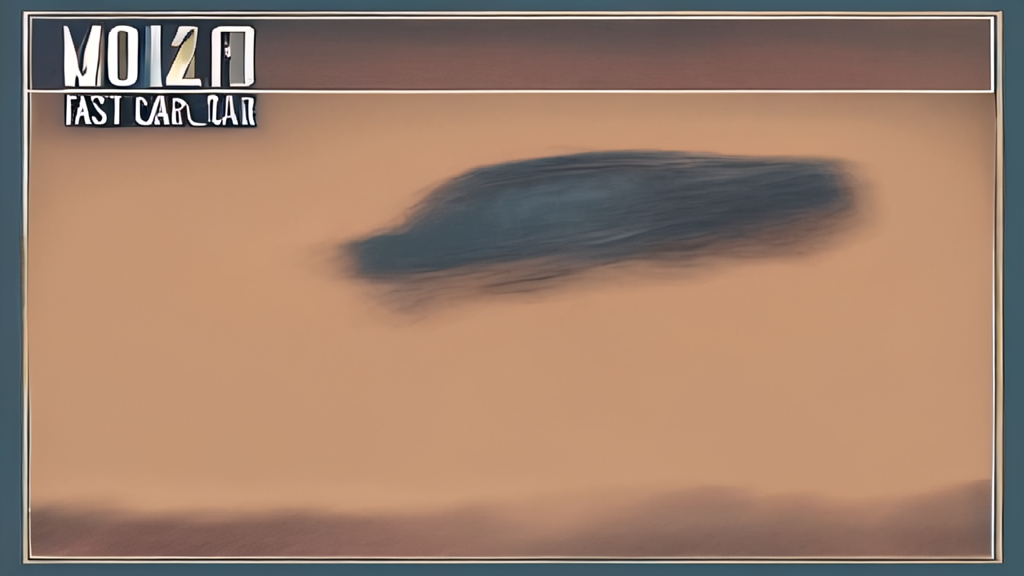

In [7]:
frames[-1]

In [8]:
len(frames)

25

## Continous set of frames

In [9]:
image = load_image("/kaggle/input/spectrogrand-survey-images/spectrogrand-survey-images/low-score/car.jpeg")
image = image.resize((1024, 576))

all_frames = [image]
MAX_FRAMES = 50

n_videos_generated = 0

while len(all_frames) <= MAX_FRAMES:
    base_image = all_frames[-1]
    frames = pipeline(base_image, decode_chunk_size=1, generator=generator).frames[0]
    n_videos_generated += 1
    all_frames.extend(frames)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

'generated_t4_2.mp4'

In [10]:
export_to_video(all_frames, f"generated_t4_full_{n_videos_generated}.mp4", fps=5)

'generated_t4_full_2.mp4'

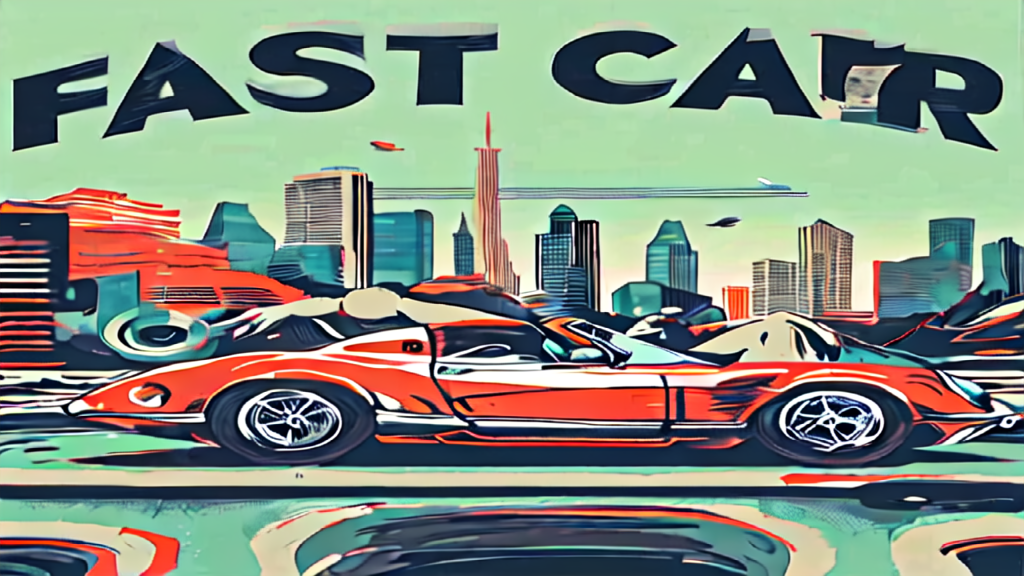

In [11]:
all_frames[-1]